# Linear Regression
for Wednesday's Lab scroll down please


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
numerical = df.select_dtypes(include = np.number)


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

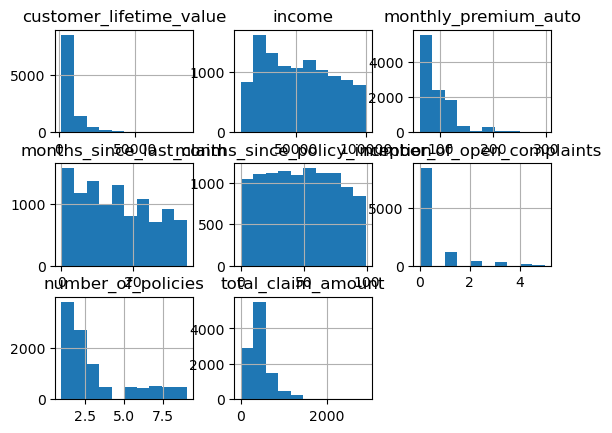

In [4]:
numerical.hist()

In [5]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

### X-y split (y is the target variable, in this case, "total claim amount")

In [9]:
X = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = numerical['total_claim_amount']

### Train-test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


### Standardize the data (after the data split!).

In [12]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [48]:
from sklearn.preprocessing import PowerTransformer

In [15]:
#pt = PowerTransformer(
#yeo_X_train = pt.fit_transform(X_train)
#yeo_X_test = pt.fit_transform(X_test)

In [16]:
#pd.DataFrame(yeo_X_test).hist(bins=60)

# Apply linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression() 
model = lm.fit(X_train_std, y_train)

### Model Interpretation

In [50]:
print(model.coef_)
print(model.intercept_)

[ -6.03281323 -34.54166177 185.39472195   1.56863312  -3.63635333
   1.55614824   3.30428432]
431.7756099789201


In [59]:
X_test_reshaped = X_test_std.reshape(-1,7)

y_test_reshaped = np.array(y_train).reshape(-1,1)

In [60]:
y_pred = model.predict(X_test_reshaped)

In [61]:
print(X_train_std.shape)


(7482, 7)


In [62]:
y_test_reshaped.shape

(7482, 1)

In [21]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [52]:
compare

,y_test,y_pred
0,120,148.168977
1,660,601.603665
2,244,374.940134
3,86,219.703041
4,1032,754.791576
...,...,...
3202,406,595.823044
3203,321,262.408773
3204,45,373.049732
3205,597,618.703721


In [22]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [63]:
mse(y_test,y_pred)

TypeError: 'numpy.float64' object is not callable

In [53]:
mae(y_test, y_pred)

168.18884769181656

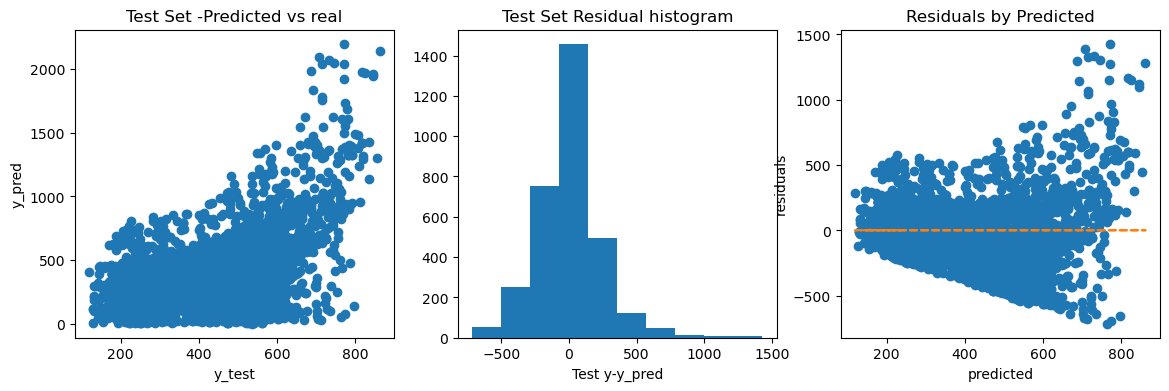

In [54]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
use powertransform on total_claim_amount

# (Wednesday)

Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
vAdjusted R2.
Feature Importance.
Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categorical variables (e.g. number of open

In [24]:
categorical = df.select_dtypes(include = object)

In [25]:
nominal_df = categorical[['region', 'response', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class']]

In [26]:
ordinal_df = categorical[['coverage', 'education', 'location_code', 'vehicle_size']]

In [44]:
nominal = pd.get_dummies(nominal_df)

In [64]:
le = LabelEncoder()
le.fit(['basic', 'extended', 'premium'])
ordinal_df['coverage'] = le.transform(ordinal_df['coverage'])

le.fit(['college', 'bachelor', 'high school or below', 'doctor', 'master'])
ordinal_df['education'] = le.transform(ordinal_df['education'])

le.fit(['corporate auto', 'personal auto', 'special auto'])
ordinal_df['policy_type'] = le.transform(ordinal_df['policy_type'])

le.fit(['medsize', 'small', 'large'])
ordinal_df['vehicle_size'] = le.transform(ordinal_df['vehicle_size'])

ValueError: y contains previously unseen labels: '0'

In [ ]:
categorical_concat = pd.concat([ordinal_df, nominal], axis=1)
categorical_concat

In [ ]:
new_df = pd.concat([numerical, categorical_concat], axis=1)
new_df.to_csv('customer.csv')
new_df


In [43]:
X = new_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'coverage', 'education', 'policy_type', 'vehicle_size',
       'region_central', 'region_east', 'region_north west',
       'region_west region', 'response_no', 'response_yes', 'gender_f',
       'gender_m', 'location_code_rural', 'location_code_suburban',
       'location_code_urban', 'marital_status_divorced',
       'marital_status_married', 'marital_status_single',
       'policy_corporate l1', 'policy_corporate l2', 'policy_corporate l3',
       'policy_personal l1', 'policy_personal l2', 'policy_personal l3',
       'policy_special l1', 'policy_special l2', 'policy_special l3',
       'renew_offer_type_offer1', 'renew_offer_type_offer2',
       'renew_offer_type_offer3', 'renew_offer_type_offer4',
       'sales_channel_agent', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_four-door car', 'vehicle_class_luxury car',
       'vehicle_class_luxury suv', 'vehicle_class_sports car',
       'vehicle_class_suv', 'vehicle_class_two-door car']]

NameError: name 'new_df' is not defined

In [29]:
y = new_df[['total_claim_amount']]

NameError: name 'new_df' is not defined

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [31]:
pt = PowerTransformer()
pt.fit(X_train)
pt.fit(X_test)

X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

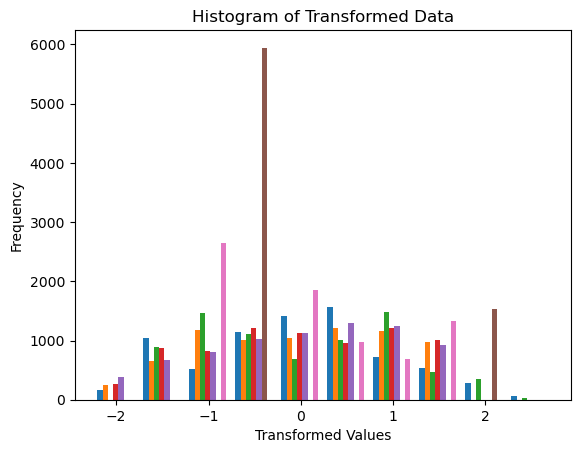

In [32]:
plt.hist(X_train_transformed, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Data')
plt.show()

In [42]:
lm = LinearRegression()
model = lm.fit(X_train_transformed, y_train)

In [34]:
print(model.coef_)
print(model.intercept_)

[ -2.60246743 -36.90221706 159.82925239   3.42821868  -2.0828269
  -1.18303744   1.81217939]
433.47641403938985


In [35]:
X_train_transformed.shape

(7482, 7)

In [36]:
y_pred = model.predict(X_test_transformed)

In [37]:
#
y_test = np.array(y_test).ravel()
y_pred = np.array(y_pred).ravel()
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [38]:
 compare

,y_test,y_pred
0,120,148.168977
1,660,601.603665
2,244,374.940134
3,86,219.703041
4,1032,754.791576
...,...,...
3202,406,595.823044
3203,321,262.408773
3204,45,373.049732
3205,597,618.703721


In [39]:
mse = np.square(np.subtract(y_test,y_pred)).mean()
rmse = np.sqrt(mse)
mae_value = mae(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 

NameError: name 'r2_score' is not defined

In [40]:
print('Mean of Squared Error is ', mse)
print('Root Mean of Squared Error is ', rmse)
print('Mean of Absolute Error is', mae)
print('R squared is ', r2)

Mean of Squared Error is  57747.177062624614
Root Mean of Squared Error is  240.30642326543128
Mean of Absolute Error is <function mean_absolute_error at 0x000001A2C067F760>


NameError: name 'r2' is not defined

In [41]:
n = X_test_std.shape[0]  # number of samples
p = X_test_std.shape[1]  # number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

NameError: name 'X_test_std' is not defined

### Adjusted R2.

In [42]:
print(adjusted_r2)

NameError: name 'adjusted_r2' is not defined

### Feature Importance.

In [43]:
coefficients = model.coef_.flatten()
feature_importance = pd.DataFrame({'Features': X.columns, 'Coefficient': coefficients})

NameError: name 'model' is not defined

In [44]:
plt.figure(figsize= (10,8))
plt.barh(feature_importance['Features'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance ')
plt.show()

NameError: name 'feature_importance' is not defined

<Figure size 1000x800 with 0 Axes>

Lab | Comparing regression models

-fit the models LinearRegression,Lasso and Ridge and compare the model performances.
-(Optional) Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.
-Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with(if necessary).
-(optional) Refit the models with the selected features.

In [45]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

NameError: name 'X_train' is not defined